In [14]:
import tensorflow as tf
from keras import layers, models
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

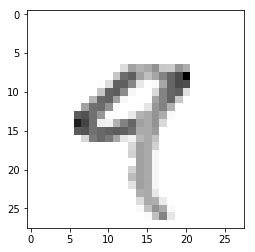

In [7]:
plt.imshow(x_train[4], cmap=plt.cm.binary)
plt.show()

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [13]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=64)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 71s 1ms/step - loss: 0.2294 - acc: 0.9275 - val_loss: 0.0714 - val_acc: 0.9795
Epoch 2/5
54000/54000 [==============================] - 65s 1ms/step - loss: 0.0647 - acc: 0.9802 - val_loss: 0.0514 - val_acc: 0.9840
Epoch 3/5
54000/54000 [==============================] - 74s 1ms/step - loss: 0.0444 - acc: 0.9863 - val_loss: 0.0396 - val_acc: 0.9888
Epoch 4/5
54000/54000 [==============================] - 70s 1ms/step - loss: 0.0327 - acc: 0.9894 - val_loss: 0.0400 - val_acc: 0.9885
Epoch 5/5
54000/54000 [==============================] - 69s 1ms/step - loss: 0.0251 - acc: 0.9923 - val_loss: 0.0401 - val_acc: 0.9897


In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 590us/step


In [19]:
test_acc

0.9896